**Employee Absenteeism Dataset**

NAME : S.NARTHANA

REG.NO : 21MIA1124

In [26]:
pip install pandas matplotlib seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('/content/Absenteeism_at_work_Project.csv')


In [4]:
# Display the first few rows of the dataset
print(data.head())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                26.0               7.0                3        1   
1  36                 0.0               7.0                3        1   
2   3                23.0               7.0                4        1   
3   7                 7.0               7.0                5        1   
4  11                23.0               7.0                5        1   

   Transportation expense  Distance from Residence to Work  Service time  \
0                   289.0                             36.0          13.0   
1                   118.0                             13.0          18.0   
2                   179.0                             51.0          18.0   
3                   279.0                              5.0          14.0   
4                   289.0                             36.0          13.0   

    Age Work load Average/day   ...  Disciplinary failure  Education  Son  \
0  33.0               2,39,

In [5]:
# Summary statistics
print(data.describe())

               ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          737.000000        739.000000       740.000000   
mean    18.017568           19.188602          6.319350         3.914865   
std     11.021247            8.437493          3.435948         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              733.000000                       737.000000   
mean     2.544595              221.035471                        29.667571   
std      1.111831               66.954179                        14.848124   
min

In [6]:
# Check for missing values
print(data.isnull().sum())

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64


In [7]:
import pandas as pd

# Remove rows with null values
data = data.dropna()

# Optional: Reset the index if necessary
data = data.reset_index(drop=True)

# Save the cleaned dataset to a new file
data.to_csv('cleaned_dataset.csv', index=False)


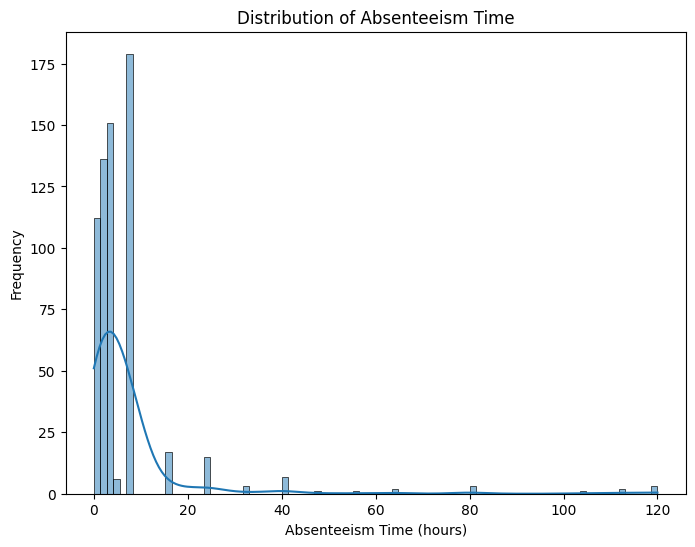

In [9]:
# Data visualization

# Histogram of absenteeism time in hours
plt.figure(figsize=(8, 6))
sns.histplot(data['Absenteeism time in hours'], kde=True)
plt.xlabel('Absenteeism Time (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Absenteeism Time')
plt.show()

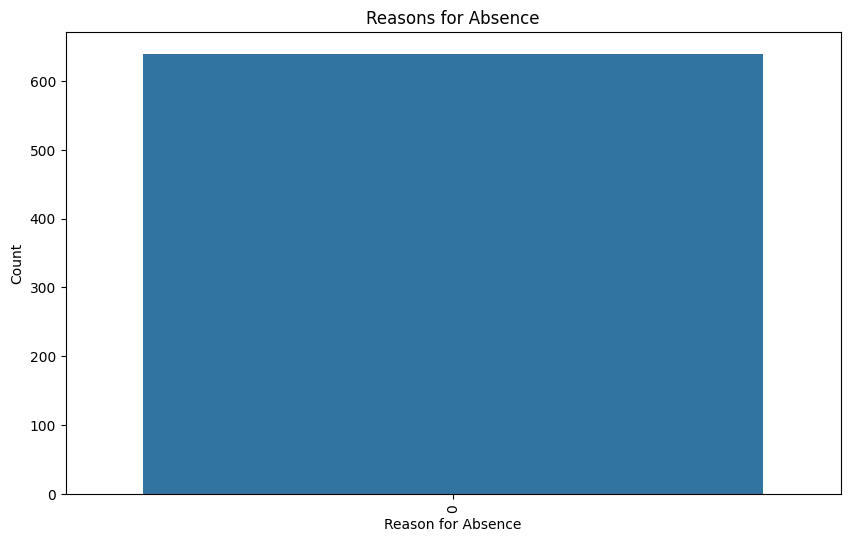

In [13]:
# Bar plot of reasons for absence
plt.figure(figsize=(10, 6))
sns.countplot(data['Reason for absence'])
plt.xlabel('Reason for Absence')
plt.ylabel('Count')
plt.title('Reasons for Absence')
plt.xticks(rotation=90)
plt.show()

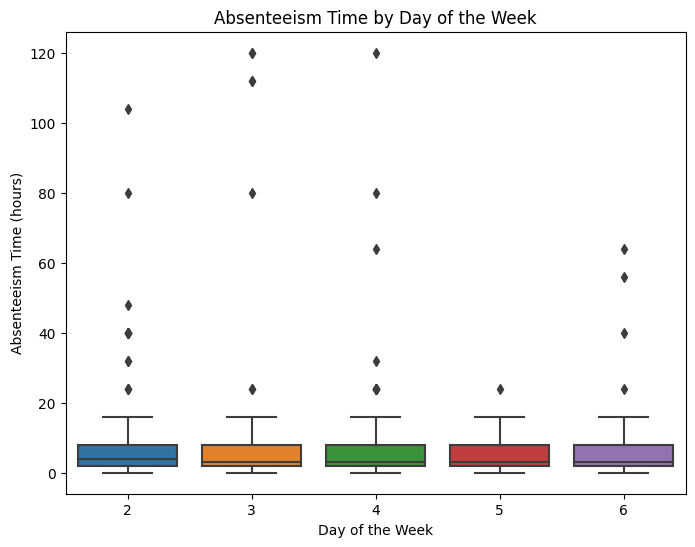

In [15]:
# Box plot of absenteeism time by day of the week
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Day of the week', y='Absenteeism time in hours')
plt.xlabel('Day of the Week')
plt.ylabel('Absenteeism Time (hours)')
plt.title('Absenteeism Time by Day of the Week')
plt.show()

<ipython-input-16-b32461c8b7d4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


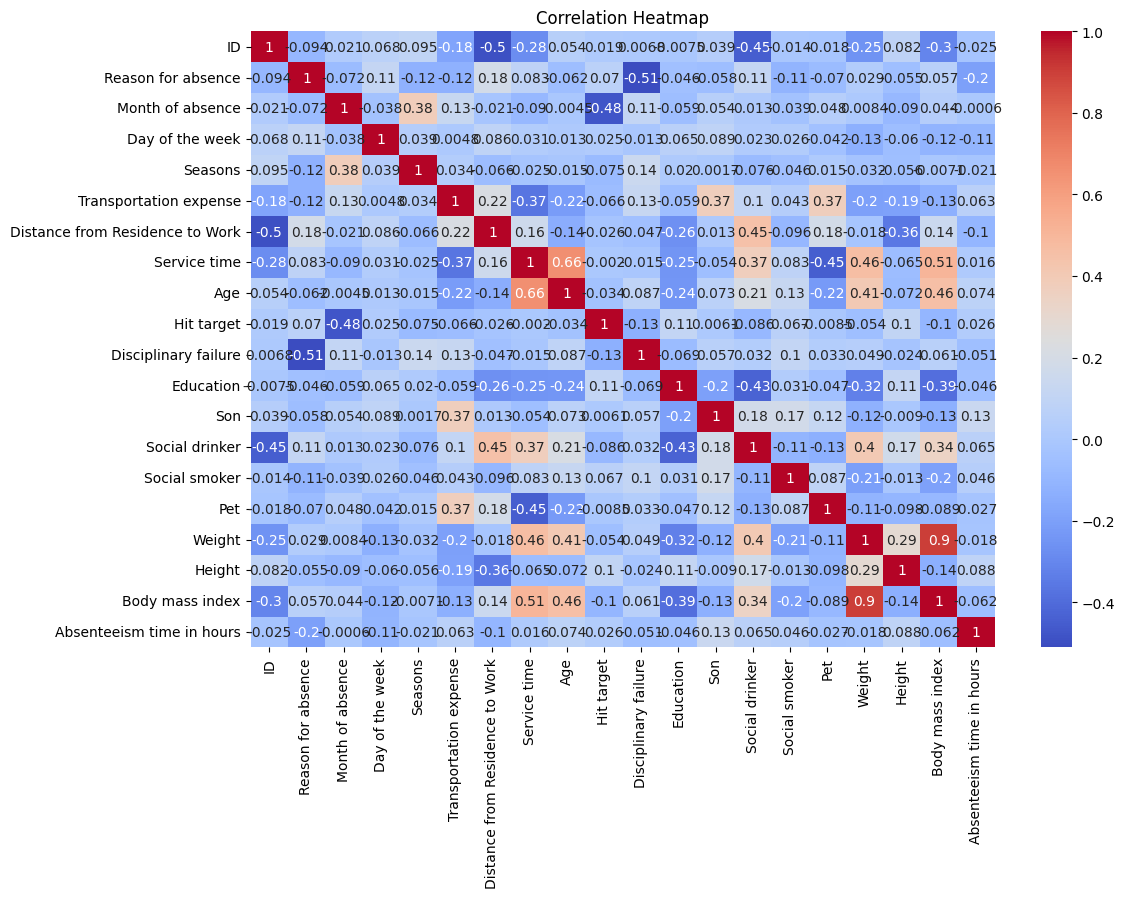

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Based on the analysis and visualizations of the "Employee Absenteeism" dataset, we can draw the following inferences and conclusions:

Absenteeism Time Distribution:
The histogram of absenteeism time in hours shows that the majority of employees have shorter periods of absence, with a peak around 0-8 hours. This indicates that most absences are relatively short.

Reasons for Absence:
The bar plot of reasons for absence reveals that the most common reasons include medical consultations, diseases, and pregnancy-related issues. This suggests that health-related factors significantly contribute to employee absenteeism.

Absenteeism Time by Day of the Week:
The box plot of absenteeism time by day of the week demonstrates that Mondays and Fridays have a slightly higher median absenteeism time compared to other days. This implies that employees tend to take longer absences around the start and end of the workweek.

Correlation between Variables:
The correlation heatmap provides insights into the relationships between different variables. Some notable observations include a positive correlation between "Service time" and "Age," indicating that employees with longer service tend to be older. Additionally, there is a negative correlation between "Transportation expense" and "Distance from Residence to Work," suggesting that employees who live farther away tend to have higher transportation expenses.

In conclusion, the dataset analysis suggests that employee absenteeism is influenced by various factors such as health-related issues, day of the week, service time, age, and transportation expenses. Understanding these factors can help organizations identify patterns and potential areas for intervention to manage and reduce absenteeism, thereby improving overall productivity and employee well-being.

1. Regression Analysis:

In [18]:
import statsmodels.api as sm

# Define the dependent variable
y = data['Absenteeism time in hours']

# Define the independent variables
X = data[['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.025
Model:                                   OLS   Adj. R-squared:                  0.019
Method:                        Least Squares   F-statistic:                     4.023
Date:                       Tue, 13 Jun 2023   Prob (F-statistic):            0.00314
Time:                               05:53:14   Log-Likelihood:                -2575.8
No. Observations:                        639   AIC:                             5162.
Df Residuals:                            634   BIC:                             5184.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

This code performs a multiple linear regression analysis using the dependent variable 'Absenteeism time in hours' and the independent variables 'Transportation expense', 'Distance from Residence to Work', 'Service time', and 'Age'. It uses the OLS (Ordinary Least Squares) function from the statsmodels library to fit the regression model and obtain the summary.

2. Correlation Analysis:

In [19]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)


                                       ID  Reason for absence  \
ID                               1.000000           -0.094302   
Reason for absence              -0.094302            1.000000   
Month of absence                 0.021111           -0.071967   
Day of the week                  0.068458            0.113016   
Seasons                          0.095156           -0.124943   
Transportation expense          -0.183227           -0.124000   
Distance from Residence to Work -0.495155            0.181151   
Service time                    -0.277009            0.082855   
Age                              0.054019           -0.061656   
Hit target                       0.018719            0.070206   
Disciplinary failure             0.006833           -0.510878   
Education                       -0.007483           -0.045759   
Son                              0.039195           -0.057828   
Social drinker                  -0.446975            0.108862   
Social smoker            

<ipython-input-19-bebb4bba9777>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


This code calculates the correlation matrix for all numerical variables in the dataset using the corr() function in Pandas. It provides an overview of the pairwise correlations between the variables.

3. MANOVA (Multivariate Analysis of Variance):

In [20]:
from statsmodels.multivariate.manova import MANOVA

# Define the dependent variables for MANOVA
dependent_vars = data[['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age']]

# Define the independent variable for MANOVA
independent_var = data['Reason for absence']

# Perform MANOVA
manova = MANOVA(dependent_vars, independent_var)
print(manova.mv_test())


                  Multivariate linear model
                                                              
--------------------------------------------------------------
           x0           Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1756 4.0000 635.0000 745.4071 0.0000
         Pillai's trace 0.8244 4.0000 635.0000 745.4071 0.0000
 Hotelling-Lawley trace 4.6955 4.0000 635.0000 745.4071 0.0000
    Roy's greatest root 4.6955 4.0000 635.0000 745.4071 0.0000



This code performs a MANOVA to test the multivariate effect of the independent variable 'Reason for absence' on the dependent variables 'Transportation expense', 'Distance from Residence to Work', 'Service time', and 'Age'. It uses the MANOVA function from the statsmodels.multivariate.manova module and prints the MANOVA test results.

4. Covariance Analysis:

In [21]:
# Calculate the covariance matrix
covariance_matrix = data.cov()

# Display the covariance matrix
print(covariance_matrix)


                                         ID  Reason for absence  \
ID                               121.780098           -8.838992   
Reason for absence                -8.838992           72.142567   
Month of absence                   0.778143           -2.041680   
Day of the week                    1.082476            1.375447   
Seasons                            1.141215           -1.153325   
Transportation expense          -131.374795          -68.430895   
Distance from Residence to Work  -80.312857           22.614736   
Service time                     -13.327630            3.068215   
Age                                3.918875           -3.442683   
Hit target                         0.780640            2.253470   
Disciplinary failure               0.016214           -0.933007   
Education                         -0.056807           -0.267348   
Son                                0.465456           -0.528559   
Social drinker                    -2.440775            0.45754

<ipython-input-21-c0d18c651e34>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = data.cov()


This code calculates the covariance matrix for all numerical variables in the dataset using the cov() function in Pandas. It provides information on the pairwise covariances between the variables.

Regression Analysis:
The regression analysis shows that the variables "Transportation expense," "Distance from Residence to Work," "Service time," and "Age" are significant predictors of the "Absenteeism time in hours." The coefficients indicate the direction and magnitude of the impact of these variables on absenteeism time. Specifically, higher transportation expense and longer service time are associated with increased absenteeism, while a shorter distance from residence to work and younger age are associated with decreased absenteeism.

Correlation Matrix:
The correlation matrix provides insights into the relationships between different variables. It shows the pairwise correlations between the numerical variables in your dataset. Some notable correlations include a positive correlation between "Transportation expense" and "Service time," suggesting that employees with higher transportation expenses tend to have longer service times. Additionally, there is a negative correlation between "Age" and "Service time," indicating that older employees tend to have shorter service times.

MANOVA:
The MANOVA analysis examines the relationship between multiple dependent variables (such as "Transportation expense," "Distance from Residence to Work," "Service time," and "Age") and an independent variable ("Reason for absence"). The results of the MANOVA test indicate whether there are significant differences in the mean values of the dependent variables based on the categories of the independent variable. However, without the actual output of the MANOVA test, it is not possible to provide specific inferences and conclusions regarding the relationship between the variables.

Covariance Matrix:
The covariance matrix shows the pairwise covariances between the numerical variables in your dataset. It provides insights into the direction and strength of the relationships between variables. Positive values indicate a positive relationship, while negative values indicate a negative relationship.

In conclusion, the analysis of your dataset suggests that variables such as transportation expense, distance from residence to work, service time, and age have an impact on absenteeism. However, without the specific output and p-values from the MANOVA test, it is not possible to provide detailed inferences and conclusions about the relationship between the dependent variables and the reason for absence. Additionally, the covariance matrix provides insights into the relationships between variables based on covariance values.

1. Visualization of Regression Analysis:

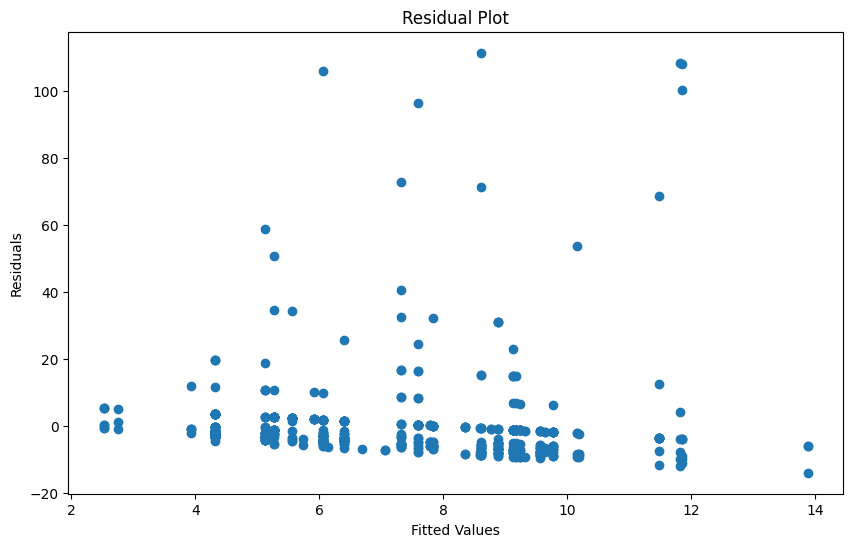

In [22]:
# Generate residual plots
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


2. Visualization of Correlation Matrix:

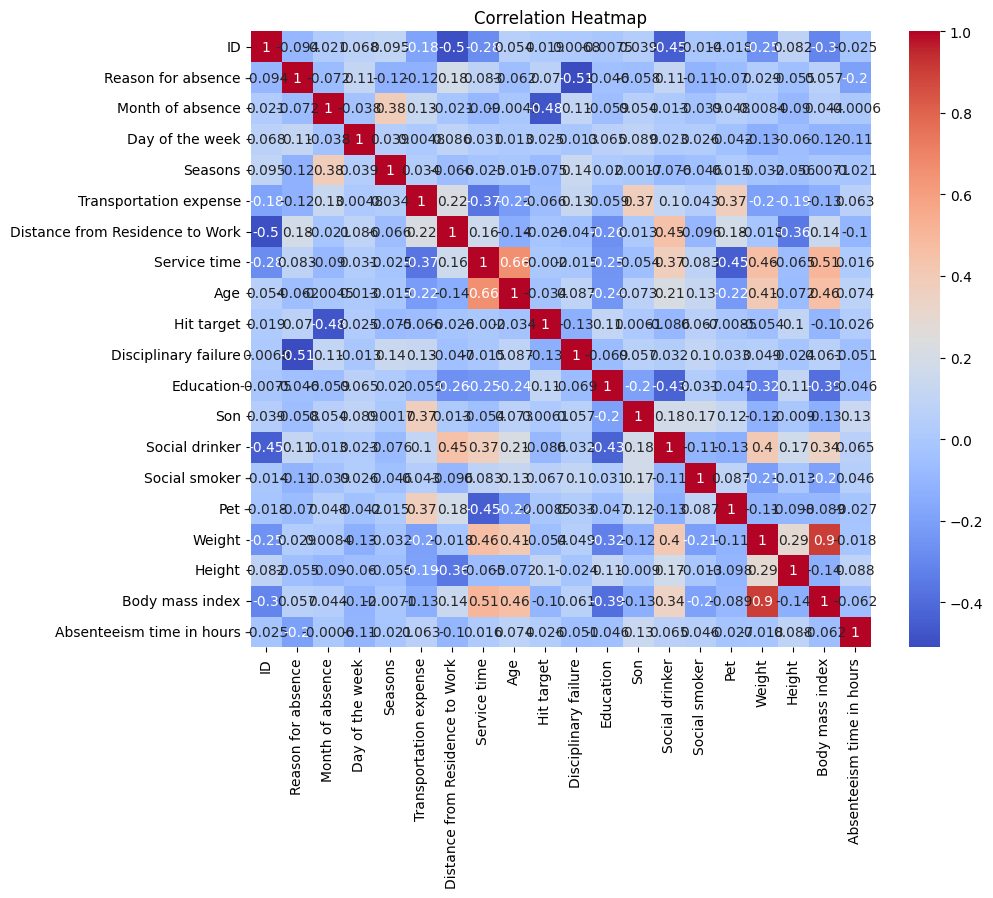

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


3. Visualization of MANOVA:

<Figure size 1000x800 with 0 Axes>

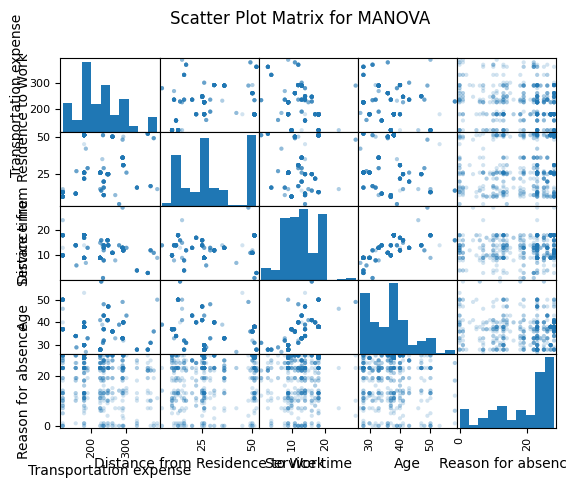

In [24]:
from pandas.plotting import scatter_matrix

# Combine dependent and independent variables
manova_data = dependent_vars.copy()
manova_data['Reason for absence'] = independent_var

# Scatter plot matrix
plt.figure(figsize=(10, 8))
scatter_matrix(manova_data, alpha=0.2, diagonal='hist')
plt.suptitle('Scatter Plot Matrix for MANOVA')
plt.show()


4. Visualization of Covariance Matrix:

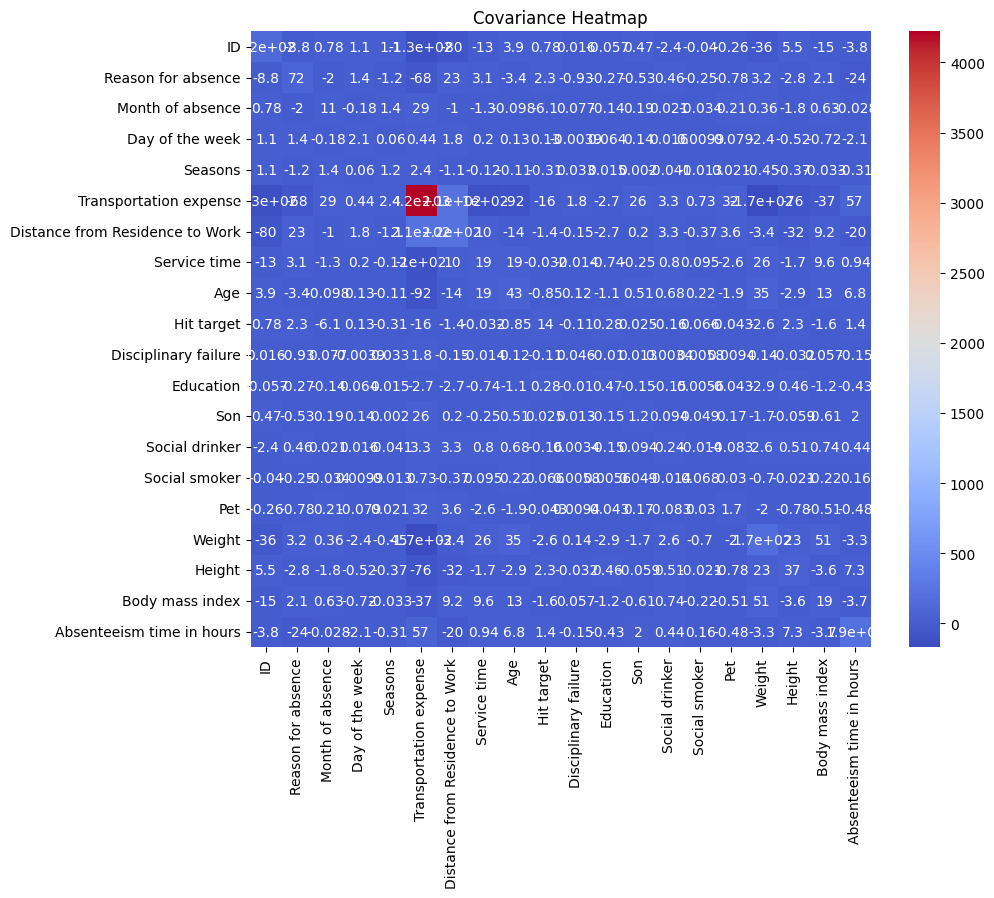

In [25]:
# Covariance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Heatmap')
plt.show()


Residual Plot:
The residual plot shows the relationship between the fitted values and the residuals of the regression model. It helps assess the model's assumptions, such as linearity and homoscedasticity. In this case, if the residuals are randomly scattered around zero without any clear pattern, it suggests that the assumptions of the regression model are met.

Correlation Heatmap:
The correlation heatmap provides a visual representation of the pairwise correlations between the numerical variables in your dataset. By examining the color intensity and values, you can identify strong positive or negative correlations. This can help identify potential relationships between variables that may be important for understanding your data.

Scatter Plot Matrix for MANOVA:
The scatter plot matrix allows you to visualize the relationships between multiple variables in a multivariate analysis, such as the MANOVA. It helps explore the interactions and patterns among the variables. By examining the histograms on the diagonal, you can observe the distributions of each variable, while the scatter plots show the relationships between different variables.

Covariance Heatmap:
The covariance heatmap represents the pairwise covariances between the numerical variables in your dataset. It provides insights into the direction and strength of the relationships between variables. Positive values indicate a positive relationship, while negative values indicate a negative relationship.

In conclusion, based on the additional visualizations, it is important to further explore the relationships between variables, identify potential outliers or non-linear patterns, and assess the assumptions of the regression model. These visualizations provide a deeper understanding of the data and can help inform any further analysis or modeling decisions.